# Type H: house,cottage,villa,semi,terrace

https://www.architectureanddesign.com.au/features/list/house-sizing-australia-trends-averages-and-standar

In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [79]:
df_h = pd.read_csv('htype.csv')
df_h.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,PricePerSqFt
0,Abbotsford,2,h,1480000,2.5,2,1,1.0,202,151.96765,1964,-37.7996,144.9984,7326.732673
1,Abbotsford,2,h,1035000,2.5,2,1,0.0,156,79.00000,1900,-37.8079,144.9934,6634.615385
2,Abbotsford,3,h,1465000,2.5,3,2,0.0,134,150.00000,1900,-37.8093,144.9944,10932.835821
3,Abbotsford,3,h,850000,2.5,3,2,1.0,94,151.96765,1964,-37.7969,144.9969,9042.553191
4,Abbotsford,4,h,1600000,2.5,3,1,2.0,120,142.00000,2014,-37.8072,144.9941,13333.333333


### Remove 'inf' in PricePerSqFt

In [80]:
df_h.shape

(9264, 14)

In [81]:
# Replace 'inf' with 'NaN'
df_h['PricePerSqFt'] = df_h['PricePerSqFt'].replace([np.inf, -np.inf], np.nan)

# Drop rows with 'NaN' in 'PricePerSqFt' column
df_h = df_h.dropna(subset=['PricePerSqFt'])

## Outlier removal

### Remove outliers that is 3 z away

In [82]:
column = ['Landsize','BuildingArea']

for col in column:
    df_h['zscore'] = (df_h[col] - df_h[col].mean()) / df_h[col].std()
    df_h = df_h[(df_h['zscore'] > -3) & (df_h['zscore'] < 3)]
    
df_h = df_h.drop('zscore', axis=1)

### Bedroom outliers
It said that 1 bedroom house has an average area of 60

In [83]:
df_h.shape

(9187, 14)

In [84]:
df_h[df_h['Landsize'] / df_h['Bedroom2'] < 60]

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,PricePerSqFt
2,Abbotsford,3,h,1465000,2.5,3,2,0.0,134,150.00000,1900,-37.80930,144.99440,10932.835821
3,Abbotsford,3,h,850000,2.5,3,2,1.0,94,151.96765,1964,-37.79690,144.99690,9042.553191
4,Abbotsford,4,h,1600000,2.5,3,1,2.0,120,142.00000,2014,-37.80720,144.99410,13333.333333
12,Abbotsford,3,h,1200000,2.5,3,2,1.0,113,110.00000,1880,-37.80560,144.99300,10619.469027
19,Abbotsford,3,h,1447500,2.5,3,3,1.0,166,174.00000,2012,-37.80170,145.00010,8719.879518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,other,5,h,739000,14.5,5,2,2.0,295,151.96765,1964,-37.71945,144.82418,2505.084746
9161,Kew,4,h,1800000,5.4,4,2,2.0,191,151.96765,1964,-37.80001,145.03125,9424.083770
9174,Maidstone,3,h,735000,6.4,3,1,1.0,167,110.00000,2010,-37.78817,144.87873,4401.197605
9186,Moonee Ponds,4,h,1525000,6.2,4,3,0.0,233,151.96765,1964,-37.76884,144.91708,6545.064378


In [85]:
df_h1 = df_h[df_h['Landsize'] / df_h['Bedroom2'] >= 60]

In [86]:
df_h1.shape

(8683, 14)

### Remove using std and mean for PricePerSqFT

In [87]:
df_h1.PricePerSqFt.describe()

count     8683.000000
mean      2698.821347
std       1953.244625
min         91.621459
25%       1361.995155
50%       2108.294931
75%       3351.915114
max      20568.181818
Name: PricePerSqFt, dtype: float64

Assume that the data is normally distributed, then most of the data will fall in the 68% of the curve. To calculate it, we need to find the mean and std. 

In [88]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Suburb'):
        m = np.mean(subdf.PricePerSqFt)
        st = np.std(subdf.PricePerSqFt)
        reduced_df = subdf[(subdf.PricePerSqFt>(m-st)) & (subdf.PricePerSqFt<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [89]:
df_h2 = remove_pps_outliers(df_h1)
df_h2.shape

(6604, 14)

### Remove properties within the same location where example the price of 3 bedroom is smaller than the price of 2 bedroom. 

In [90]:
df_h2.head(2)

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,PricePerSqFt
0,Abbotsford,2,h,1480000,2.5,2,1,1.0,202,151.96765,1964,-37.7996,144.9984,7326.732673
1,Abbotsford,2,h,1035000,2.5,2,1,0.0,156,79.00000,1900,-37.8079,144.9934,6634.615385


In [91]:
df_h2.Suburb.value_counts()

Suburb
other             394
Reservoir         187
Preston           158
Bentleigh East    133
Coburg            107
                 ... 
Carrum Downs        5
Parkville           4
Carlton             4
Balaclava           3
West Melbourne      3
Name: count, Length: 201, dtype: int64

In [92]:
def plot_scatter_chart(df,Suburb):
    bhk2 = df[(df.Suburb==Suburb) & (df.Bedroom2==2)]
    bhk3 = df[(df.Suburb==Suburb) & (df.Bedroom2==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Landsize,bhk2.Price,color='blue',label='2 bedroom', s=50)
    plt.scatter(bhk3.Landsize,bhk3.Price,marker='+', color='green',label='3 bedroom', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(Suburb)
    plt.legend()

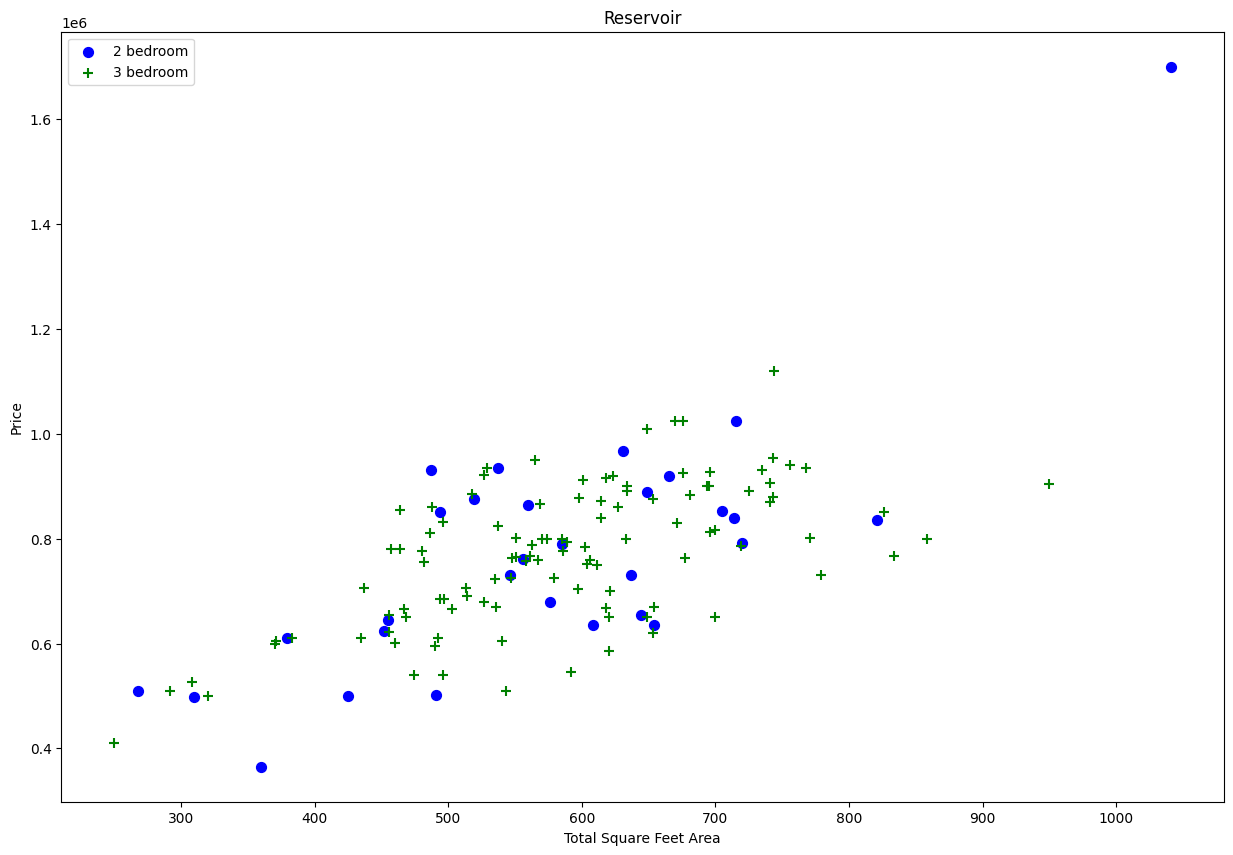

In [93]:
plot_scatter_chart(df_h2,"Reservoir")

We will create a dictionary of 2 bedroom and 3 bedroom. Compare it, if the price per square foot of mean of 3 is less than 2, we remove it

In [94]:
df_h2.head(2)

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,PricePerSqFt
0,Abbotsford,2,h,1480000,2.5,2,1,1.0,202,151.96765,1964,-37.7996,144.9984,7326.732673
1,Abbotsford,2,h,1035000,2.5,2,1,0.0,156,79.00000,1900,-37.8079,144.9934,6634.615385


In [95]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Suburb'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Bedroom2'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.PricePerSqFt),
                'std': np.std(bhk_df.PricePerSqFt),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Bedroom2'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.PricePerSqFt<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [96]:
df_h3 = remove_bhk_outliers(df_h2)
df_h3.shape

(4658, 14)

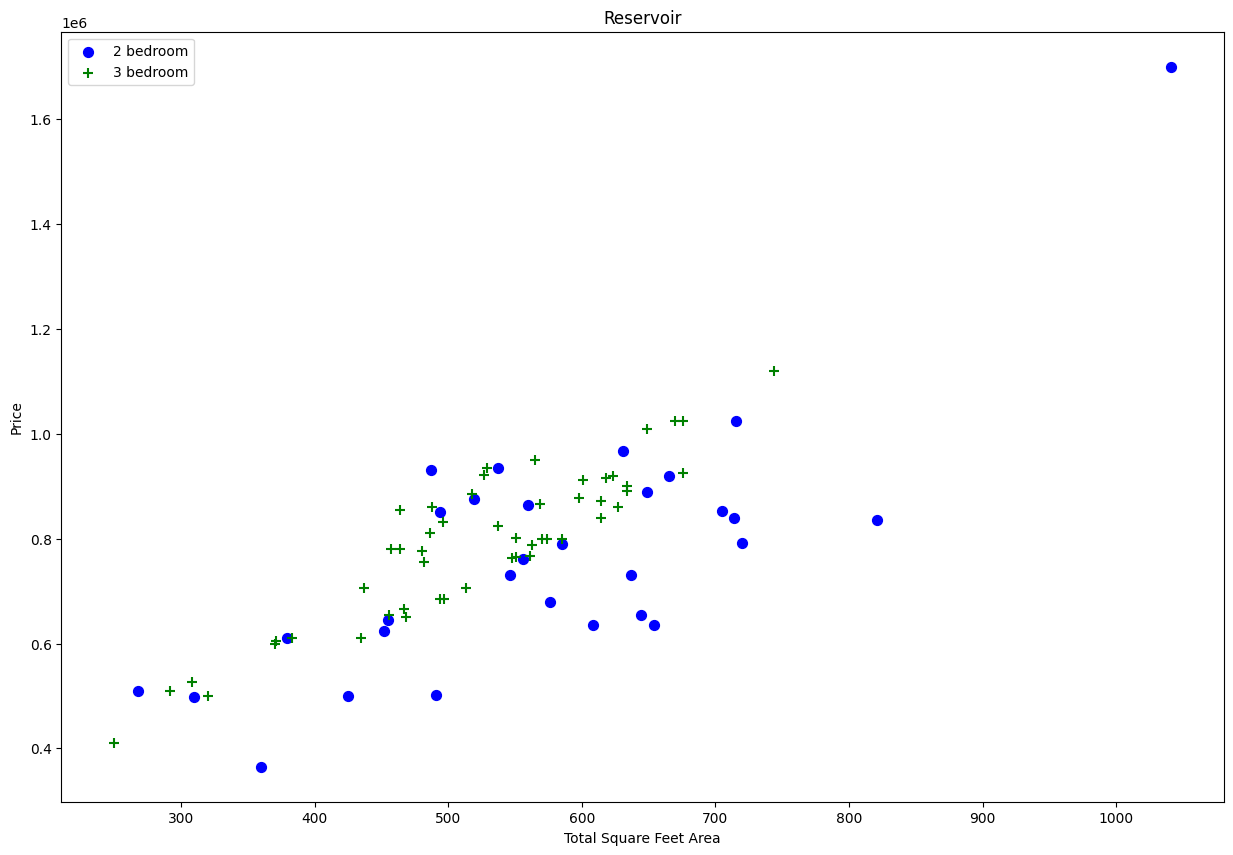

In [97]:
plot_scatter_chart(df_h3,"Reservoir")

Text(0, 0.5, 'Count')

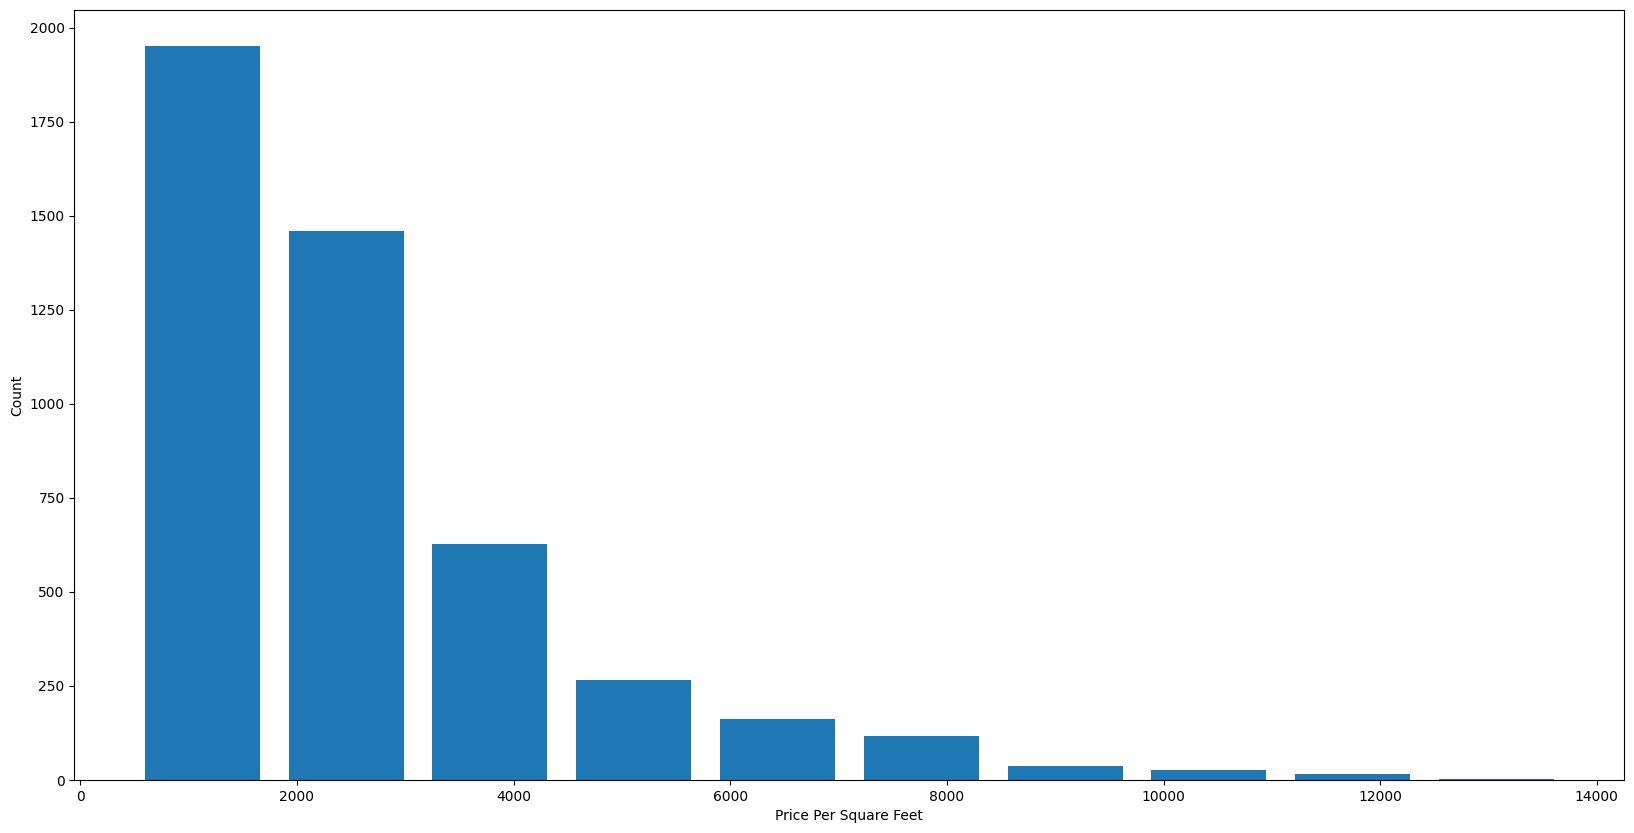

In [98]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df_h3.PricePerSqFt,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Bathroom outliers

If the number of bathroom is +2 number of bedroom, we should remove it

In [99]:
df_h3.head(2)

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,PricePerSqFt
0,Abbotsford,2,h,1480000,2.5,2,1,1.0,202,151.96765,1964,-37.7996,144.9984,7326.732673
1,Abbotsford,2,h,1035000,2.5,2,1,0.0,156,79.00000,1900,-37.8079,144.9934,6634.615385


In [100]:
df_h3.Bathroom.unique()

array([1, 2, 3, 4, 0, 5, 8, 6])

Text(0, 0.5, 'Count')

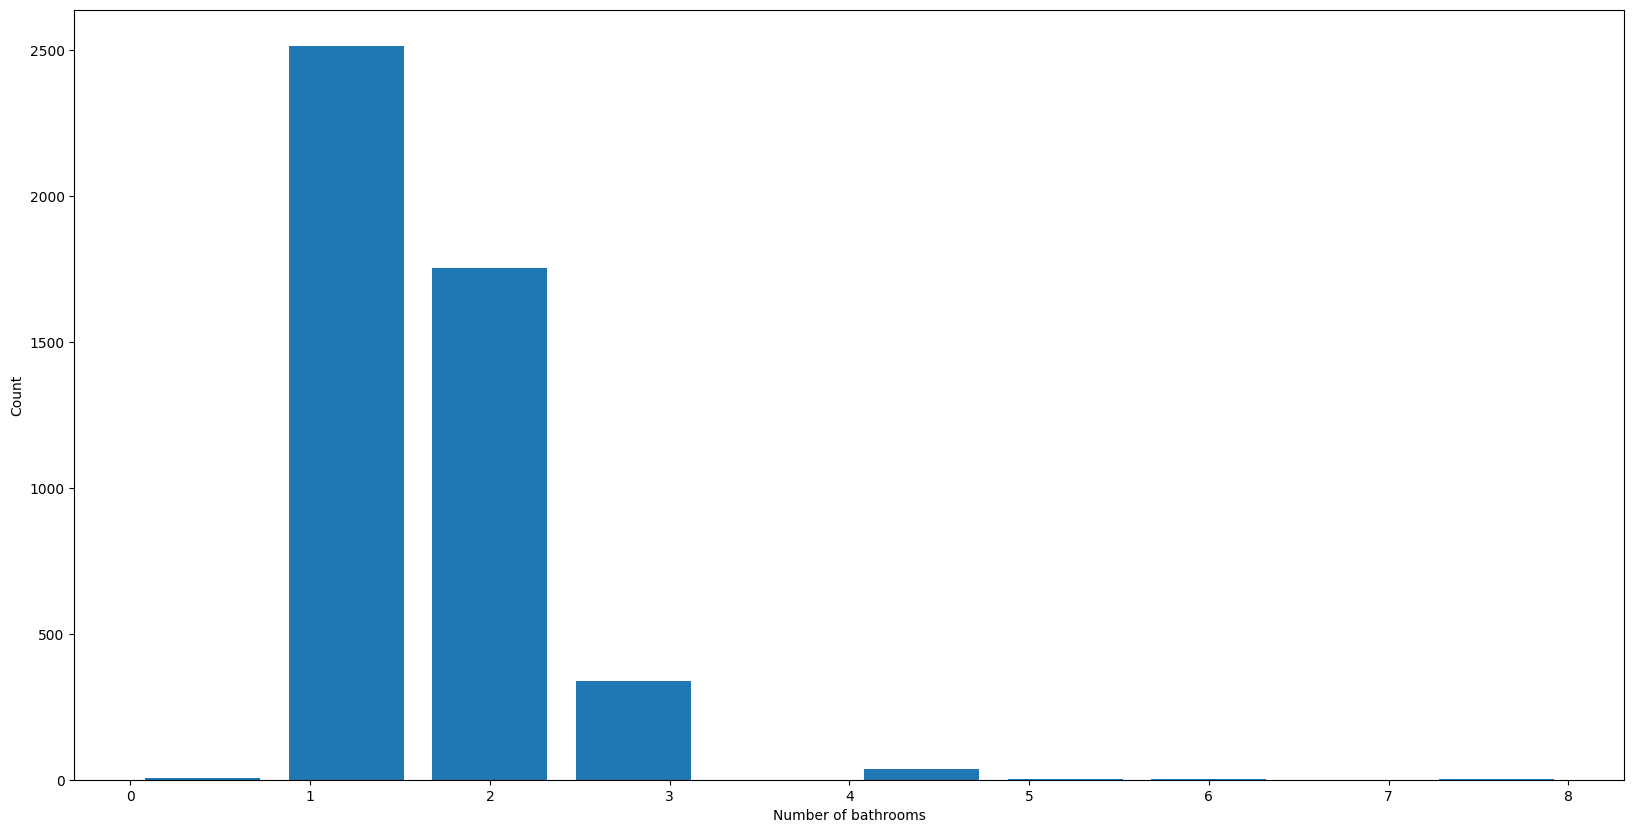

In [101]:
plt.hist(df_h3.Bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [102]:
df_h3[df_h3.Bathroom>df_h3.Bedroom2+2]

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,PricePerSqFt
66,Airport West,4,h,1026000,10.4,0,3,2.0,534,151.96765,1964,-37.72623,144.86773,1921.348315


In [103]:
df_h4 = df_h3[df_h3.Bathroom<df_h3.Bedroom2+2]
df_h4.shape

(4655, 14)

### Dropping PricePerSqFt column

In [104]:
df_h5 = df_h4.drop(['PricePerSqFt', 'Type', 'Rooms'], axis='columns')
df_h5.head(3)

,Suburb,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,Abbotsford,1480000,2.5,2,1,1.0,202,151.96765,1964,-37.7996,144.9984
1,Abbotsford,1035000,2.5,2,1,0.0,156,79.00000,1900,-37.8079,144.9934
2,Abbotsford,941000,2.5,2,1,0.0,181,151.96765,1964,-37.8041,144.9953


## One hot encoding

In [105]:
dummies = pd.get_dummies(df_h5.Suburb)
dummies.head(3)

,Abbotsford,Aberfeldie,Airport West,Albert Park,Albion,Alphington,Altona,Altona North,Armadale,Ascot Vale,...,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [106]:
df_h6 = pd.concat([df_h5,dummies.drop('other',axis='columns')],axis='columns')
df_h6.head(3)

,Suburb,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
0,Abbotsford,1480000,2.5,2,1,1.0,202,151.96765,1964,-37.7996,...,False,False,False,False,False,False,False,False,False,False
1,Abbotsford,1035000,2.5,2,1,0.0,156,79.00000,1900,-37.8079,...,False,False,False,False,False,False,False,False,False,False
2,Abbotsford,941000,2.5,2,1,0.0,181,151.96765,1964,-37.8041,...,False,False,False,False,False,False,False,False,False,False


In [107]:
df_h7 = df_h6.drop('Suburb',axis='columns')
df_h7.head(3)

,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
0,1480000,2.5,2,1,1.0,202,151.96765,1964,-37.7996,144.9984,...,False,False,False,False,False,False,False,False,False,False
1,1035000,2.5,2,1,0.0,156,79.00000,1900,-37.8079,144.9934,...,False,False,False,False,False,False,False,False,False,False
2,941000,2.5,2,1,0.0,181,151.96765,1964,-37.8041,144.9953,...,False,False,False,False,False,False,False,False,False,False


## Training split

In [108]:
df_h7.shape

(4655, 210)

In [109]:
X = df_h7.drop(['Price'],axis='columns')

In [110]:
X.head(2)

,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Abbotsford,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
0,2.5,2,1,1.0,202,151.96765,1964,-37.7996,144.9984,True,...,False,False,False,False,False,False,False,False,False,False
1,2.5,2,1,0.0,156,79.00000,1900,-37.8079,144.9934,True,...,False,False,False,False,False,False,False,False,False,False


In [111]:
y = df_h7.Price

In [112]:
y.head(2)

0    1480000
1    1035000
Name: Price, dtype: int64

## Model evaluations

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params' : {
                'n_estimators': [1,5,10,20,30,40]
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'poisson', 'friedman_mse', 'absolute_error'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.825369,{}
1,random_forest,0.863954,{'n_estimators': 40}
2,gradient_boosting,0.874848,"{'learning_rate': 0.1, 'n_estimators': 200}"
3,lasso,0.825370,"{'alpha': 1, 'selection': 'random'}"
4,decision_tree,0.748053,"{'criterion': 'poisson', 'splitter': 'best'}"


### Random forest

In [115]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

rf_model_test = cross_val_score(RandomForestRegressor(n_estimators=40), X, y, cv=cv)
rf_model_test

array([0.84964   , 0.85909027, 0.8854522 , 0.86911703, 0.85377559])

In [116]:
rf_model_test.mean()

0.8634150190686863

### Gradient boost

In [117]:
gradient_model_test = cross_val_score(GradientBoostingRegressor(learning_rate=0.1, n_estimators=200), X, y, cv=cv)
gradient_model_test

array([0.85404925, 0.86608273, 0.89358949, 0.87365888, 0.88559752])

In [118]:
gradient_model_test.mean()

0.8745955744321915

## Without feature scailing 

In [119]:
gradient_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
gradient_model.fit(X_train, y_train)
gradient_model.score(X_test, y_test)

0.878312720836939

In [120]:
rf_model = RandomForestRegressor(n_estimators=40)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.8549025350397739

## With feature scailing

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.56791856, -1.31804288, -0.80064003, ..., -0.04866876,
        -0.06054232, -0.10207315],
       [-1.56791856, -1.31804288, -0.80064003, ..., -0.04866876,
        -0.06054232, -0.10207315],
       [-1.56791856, -1.31804288, -0.80064003, ..., -0.04866876,
        -0.06054232, -0.10207315],
       ...,
       [ 2.62726524, -0.17591898,  0.64841881, ..., -0.04866876,
        -0.06054232, -0.10207315],
       [ 0.11015496,  0.96620493,  0.64841881, ..., -0.04866876,
        -0.06054232, -0.10207315],
       [ 0.48686534,  0.96620493,  0.64841881, ..., -0.04866876,
        -0.06054232, -0.10207315]])

In [122]:
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled,y,test_size=0.2,random_state=10)

In [123]:
gradient_model_scaled = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200)
gradient_model_scaled.fit(X_scaled_train, y_scaled_train)
gradient_model_scaled.score(X_scaled_test, y_scaled_test)

0.8822084150031468

In [124]:
rf_model_scaled = RandomForestRegressor(n_estimators=40)
rf_model_scaled.fit(X_scaled_train, y_scaled_train)
rf_model_scaled.score(X_scaled_test, y_scaled_test)

0.8711797184987514

#### Without scale is better

## Testing models

In [125]:
X.columns

Index(['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Abbotsford',
       ...
       'Werribee', 'West Footscray', 'West Melbourne', 'Westmeadows',
       'Wheelers Hill', 'Williamstown', 'Williamstown North', 'Windsor',
       'Yallambie', 'Yarraville'],
      dtype='object', length=209)

In [126]:
X_test.columns

Index(['Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Abbotsford',
       ...
       'Werribee', 'West Footscray', 'West Melbourne', 'Westmeadows',
       'Wheelers Hill', 'Williamstown', 'Williamstown North', 'Windsor',
       'Yallambie', 'Yarraville'],
      dtype='object', length=209)

In [127]:
np.where(X_test.columns=='Abbotsford')[0][0]

9

In [128]:
df_h7.head()

,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
0,1480000,2.5,2,1,1.0,202,151.96765,1964,-37.7996,144.9984,...,False,False,False,False,False,False,False,False,False,False
1,1035000,2.5,2,1,0.0,156,79.00000,1900,-37.8079,144.9934,...,False,False,False,False,False,False,False,False,False,False
2,941000,2.5,2,1,0.0,181,151.96765,1964,-37.8041,144.9953,...,False,False,False,False,False,False,False,False,False,False
3,1876000,2.5,4,2,0.0,245,210.00000,1910,-37.8024,144.9993,...,False,False,False,False,False,False,False,False,False,False
4,1636000,2.5,2,1,2.0,256,107.00000,1890,-37.8060,144.9954,...,False,False,False,False,False,False,False,False,False,False


In [129]:
def predict_price_g(location,distance,bedroom2,bathroom,car,landsize,buildingArea,yearBuilt,lattitude,longtitude):    
    loc_index = np.where(X_test.columns==location)[0][0]

    x = np.zeros(len(X_test.columns))
    x[0] = distance
    x[1] = bedroom2
    x[2] = bathroom
    x[3] = car
    x[4] = landsize
    x[5] = buildingArea
    x[6] = yearBuilt
    x[7] = lattitude
    x[8] = longtitude
    if loc_index >= 0:
        x[loc_index] = 1

    return gradient_model.predict([x])[0]

In [130]:
def predict_price_rf(location,distance,bedroom2,bathroom,car,landsize,buildingArea,yearBuilt,lattitude,longtitude):    
    loc_index = np.where(X_test.columns==location)[0][0]

    x = np.zeros(len(X_test.columns))
    x[0] = distance
    x[1] = bedroom2
    x[2] = bathroom
    x[3] = car
    x[4] = landsize
    x[5] = buildingArea
    x[6] = yearBuilt
    x[7] = lattitude
    x[8] = longtitude
    if loc_index >= 0:
        x[loc_index] = 1

    return rf_model.predict([x])[0]

In [131]:
X_test[X_test['Westmeadows'] == 1].head(1)

,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Abbotsford,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
6003,16.5,3,2,4.0,673,127.0,1980,-37.67558,144.8976,False,...,False,False,False,True,False,False,False,False,False,False


In [145]:
df_h7[(df_h7['Westmeadows'] == 1) & (df_h7['Longtitude'] == 144.8976)]

,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
6003,700000,16.5,3,2,4.0,673,127.0,1980,-37.67558,144.8976,...,False,False,False,True,False,False,False,False,False,False


#### first prediction

In [143]:
predict_price_g("Westmeadows", 16.5, 3, 2, 4, 673, 127, 1980,-37.67558, 144.8976)

/home/tomadonna/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


695275.9207038743

In [144]:
predict_price_rf("Westmeadows", 16.5, 3, 2, 4, 673, 127, 1980,-37.67558, 144.8976)

/home/tomadonna/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


659487.5

#### Second prediction

In [135]:
X_test[X_test['West Footscray'] == 1].head(1)

,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Abbotsford,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
5977,8.2,3,1,1.0,397,127.0,1960,-37.7901,144.8682,False,...,False,True,False,False,False,False,False,False,False,False


In [146]:
df_h7[(df_h7['West Footscray'] == 1) & (df_h7['Longtitude'] == 144.8682)]

,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
5977,878000,8.2,3,1,1.0,397,127.0,1960,-37.7901,144.8682,...,False,True,False,False,False,False,False,False,False,False


In [147]:
predict_price_g("West Footscray", 8.2, 3, 1, 1, 397, 127, 1960, -37.7901, 144.8682)

/home/tomadonna/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


795689.6004104628

In [148]:
predict_price_rf("West Footscray", 8.2, 3, 1, 1, 397, 127, 1960, -37.7901, 144.8682)

/home/tomadonna/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


816850.0

### Third prediction

In [149]:
X_test[X_test['Yarraville'] == 1].head(1)

,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Abbotsford,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
6206,6.3,3,2,2.0,277,151.96765,1964,-37.81732,144.89091,False,...,False,False,False,False,False,False,False,False,False,True


In [150]:
df_h7[(df_h7['Yarraville'] == 1) & (df_h7['YearBuilt'] == 1964) & (df_h7['Longtitude'] == 144.89091)]

,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,Werribee,West Footscray,West Melbourne,Westmeadows,Wheelers Hill,Williamstown,Williamstown North,Windsor,Yallambie,Yarraville
6206,1300000,6.3,3,2,2.0,277,151.96765,1964,-37.81732,144.89091,...,False,False,False,False,False,False,False,False,False,True


In [151]:
predict_price_g("Yarraville", 6.3, 3, 2, 2, 277, 151.96765, 1964, -37.81732, 144.89091)

/home/tomadonna/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


1294837.6334693816

In [152]:
predict_price_rf("Yarraville", 6.3, 3, 2, 2, 277, 151.96765, 1964, -37.81732, 144.89091)

/home/tomadonna/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


1089300.625